In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.initializers import HeUniform

# Montar o modelo e treiná-lo

# Dataset MNist


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))  # (60000, 28, 28, 1)
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))  # (10000, 28, 28, 1)

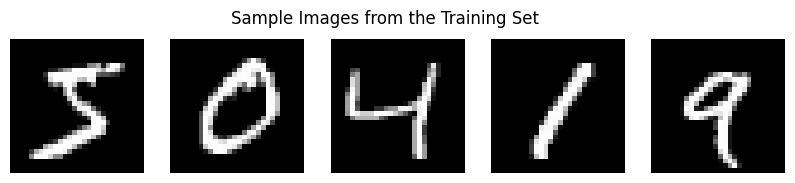

In [ ]:
# Visualization: Random sample images from the training set
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap="gray")  # Reshape the 28x28 image and display it
    axes[i].axis('off')  # Hide the axes
plt.suptitle('Sample Images from the Training Set')  # Title for the plot
plt.show()

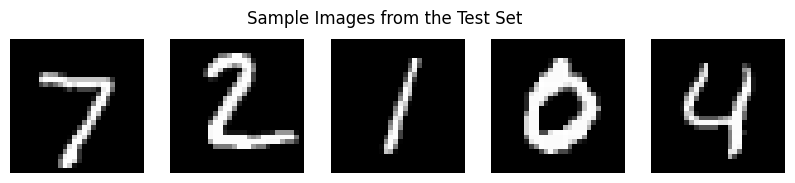

In [ ]:
# Visualization: Random sample images from the test set
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(test_images[i].reshape(28, 28), cmap="gray")  # Reshape the 28x28 image and display it
    axes[i].axis('off')  # Hide the axes
plt.suptitle('Sample Images from the Test Set')  # Title for the plot
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
def plota_resultados(msg, history,epocas):
  print(f'\n\n{msg.upper()}\n\n')
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

In [ ]:
tf.random.set_seed(42)

In [ ]:
modelo = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Ajusta para o formato das suas imagens
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas = 10
history = modelo.fit(train_images, train_labels, epochs=epocas, validation_split=0.2) # Added validation_split

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8082 - loss: 8.2473 - val_accuracy: 0.8814 - val_loss: 0.5424
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8976 - loss: 0.4240 - val_accuracy: 0.9114 - val_loss: 0.3909
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9232 - loss: 0.2961 - val_accuracy: 0.9232 - val_loss: 0.2972
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9307 - loss: 0.2613 - val_accuracy: 0.9323 - val_loss: 0.3090
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9364 - loss: 0.2397 - val_accuracy: 0.9320 - val_loss: 0.3045
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9412 - loss: 0.2283 - val_accuracy: 0.9420 - val_loss: 0.2576
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9481 - loss: 0.2118 - val_accuracy: 0.9448 - val_loss: 0.2565
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9492 - loss: 0.2055 - 

In [ ]:
plota_resultados(history=1,epocas=1)

TypeError: plota_resultados() missing 1 required positional argument: 'msg'

In [ ]:
test_loss, test_acc = modelo.evaluate(test_images,  test_labels, verbose=2)
print('\nAcurácia do modelo:', test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.9872 - loss: 0.0548

Acurácia do modelo: 0.9872000217437744


#  Adicionando camadas convolucionais

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas = 10
history = modelo.fit(train_images, train_labels, epochs=epocas, validation_split=0.2) # Added validation_split

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8869 - loss: 0.3714 - val_accuracy: 0.9825 - val_loss: 0.0609
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9807 - loss: 0.0618 - val_accuracy: 0.9864 - val_loss: 0.0473
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9873 - loss: 0.0398 - val_accuracy: 0.9894 - val_loss: 0.0399
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9877 - val_loss: 0.0459
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0203 - val_accuracy: 0.9897 - val_loss: 0.0453
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9901 - val_loss: 0.0463
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0121 - val_accuracy: 0.9885 - val_loss: 0.0544
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9953 - loss: 0.0132 



ADICIONANDO CAMADAS CONVULUCIONAIS




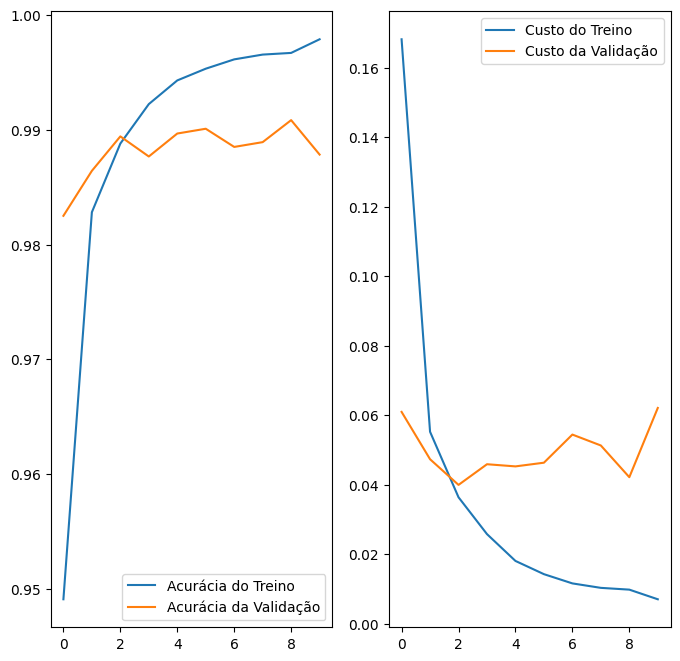

In [ ]:
msg = 'Adicionando Camadas Convulucionais'
plota_resultados(msg, history, epocas)

In [ ]:
test_loss, test_acc = modelo.evaluate(test_images,  test_labels, verbose=2)
print('\nAcurácia do modelo:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9872 - loss: 0.0548

Acurácia do modelo: 0.9872000217437744
